In [1]:
import numpy as np

In [3]:
X = np.array([
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0],
    [1 ,1, 0],
])

In [9]:
X.shape

(4, 3)

In [5]:
W = np.array([
    [1],
    [2],
    [3],
])

In [10]:
W.shape

(3, 1)

In [12]:
np.dot(X, W)

array([[3],
       [2],
       [1],
       [3]])

In [16]:
X * W.T

array([[0, 0, 3],
       [0, 2, 0],
       [1, 0, 0],
       [1, 2, 0]])

In [23]:
X @ W # np.dot(X, W) # X.dot(W)

array([[3],
       [2],
       [1],
       [3]])

In [26]:
X

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 1, 0]])

In [28]:
X.T @ X

array([[2, 1, 0],
       [1, 2, 0],
       [0, 0, 1]])

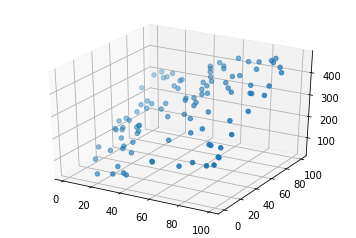

In [42]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# load the data
X = []
Y = []
for line in open('data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([float(x1), float(x2), 1]) # add the bias term
    Y.append(float(y))



# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(X)
Y = np.array(Y)



# let's plot the data to see what it looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [46]:
w = np.linalg.solve( (X.T @ X), (X.T @ Y))

In [47]:
w

array([2.01666793, 2.96985048, 1.46191241])

In [56]:
Yhat = X @ w

In [57]:
w.shape

(3,)

In [58]:
X.shape

(100, 3)

In [82]:
def r2(Y, Yhat):
    d1 = ((Y - Yhat) ** 2.0).sum()
    d2 = ((Y - Y.mean()) ** 2.0).sum()

    return ( 1 - ( d1 / d2 ) )

In [83]:
print("the r-squared is:", r2(Y, Yhat))

the r-squared is: 0.9991412296366858


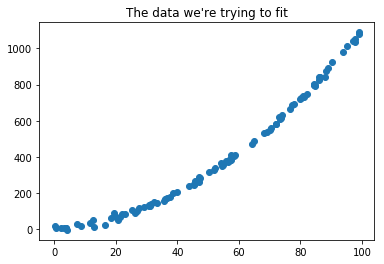

In [71]:
# load the data
X = []
Y = []
for line in open('data_poly.csv'):
    x, y = line.split(',')
    x = float(x)
    X.append([1, x, x*x]) # add the bias term x0 = 1
    # our model is therefore y_hat = w0 + w1 * x + w2 * x**2
    Y.append(float(y))

# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(X)
Y = np.array(Y)

# let's plot the data to see what it looks like
plt.scatter(X[:,1], Y)
plt.title("The data we're trying to fit")
plt.show()

In [74]:
w = np.linalg.solve( (X.T @ X), (X.T @ Y))
Yhat = X @ w

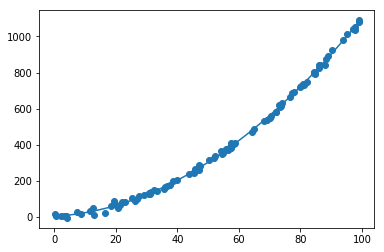

In [80]:
plt.scatter(X[:,1], Y)
plt.plot(sorted(X[:,1]), sorted(Yhat))
plt.show()

In [84]:
r2(Y, Yhat)

0.9991412296366858

In [85]:
A = np.array([
    [1, 12, 11, 41],
    [2, 13, 12, 42],
    [3, 14, 13, 43],
])

In [89]:
B = np.array([
    [1.5, 12.5, 11.5, 41.5],
    [2.5, 13.5, 12.5, 42.5],
    [3.5, 14.5, 13.5, 43.5],
])

In [91]:
A * B

array([[1.5000e+00, 1.5000e+02, 1.2650e+02, 1.7015e+03],
       [5.0000e+00, 1.7550e+02, 1.5000e+02, 1.7850e+03],
       [1.0500e+01, 2.0300e+02, 1.7550e+02, 1.8705e+03]])

In [92]:
(A * B).sum()

6354.5

In [93]:
A.T @ B

array([[  17. ,   83. ,   77. ,  257. ],
       [  99.5,  528.5,  489.5, 1659.5],
       [  92. ,  488. ,  452. , 1532. ],
       [ 317. , 1703. , 1577. , 5357. ]])

*** No CODEPAGE record, no encoding_override: will use 'ascii'


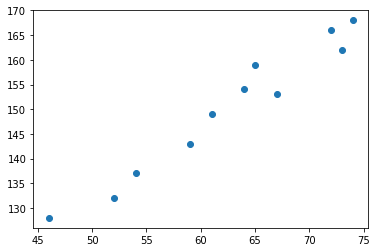

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_excel('mlr02.xls')
X = df.values

# using age to predict systolic blood pressure
plt.scatter(X[:,1], X[:,0])
plt.show()
# looks pretty linear!


In [106]:
df['ones'] = 1
# df['ten'] = 10

Y = df['X1']
X = df[['X2', 'X3', 'ones']]

X2only = df[['X2', 'ones']]
X3only = df[['X3', 'ones']]

In [107]:
def get_r2(X, Y):
    w = np.linalg.solve( X.T @ X, X.T @ Y )
    Yhat = X @ w

    # determine how good the model is by computing the r-squared
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

print("r2 for x2 only:", get_r2(X2only, Y))
print("r2 for x3 only:", get_r2(X3only, Y))
print("r2 for both:", get_r2(X, Y))

r2 for x2 only: 0.9578407208147356
r2 for x3 only: 0.9419952085293065
r2 for both: 0.9768471041502091
